In [438]:
# librerías
import numpy as np
np.random.seed(2024)
from scipy import signal
from scipy.io import loadmat
import torch
torch.set_warn_always(False)
from keras.utils import to_categorical # type: ignore
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

$\underline{\text{Ejercicio } 1}$  
Implemente un perceptrón simple que aprenda la función lógica $\text{AND}$ y la función lógica $\text{OR}$, de $2$ y de $4$ entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de $2$ dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

$\underline{\text{Solución:}}$  
$\text{Tabla de verdad del AND}$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $\text{AND}(x_1,x_2)$ | $0$ | $0$ | $0$ | $1$ |

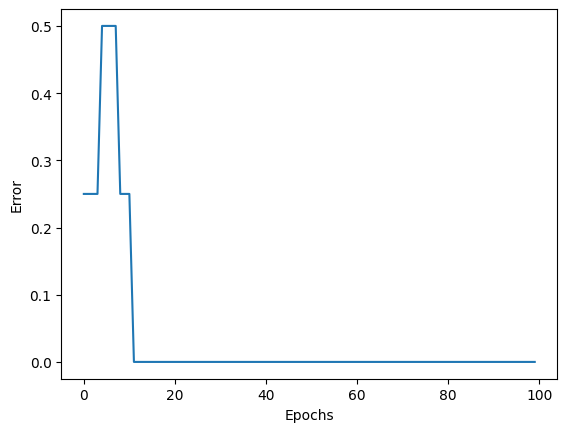

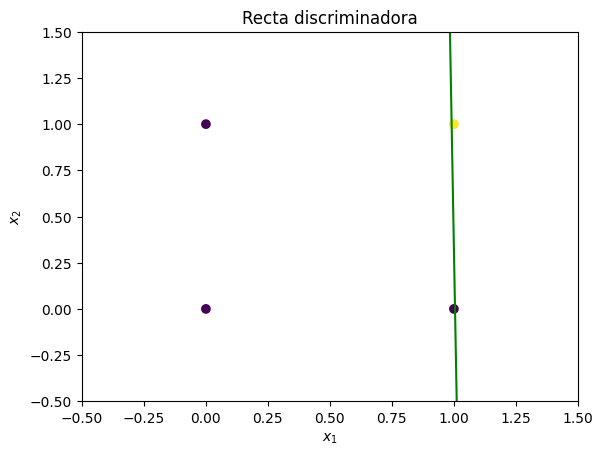

In [508]:
# and de dos entradas
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2))
Y = np.reshape([0, 0, 0, 1], 4)

# inicializo los pesos aleatoriamente
weights = np.random.randn(3) # el peso extra es para el bias
predict = lambda x: 0 if np.tanh(np.dot(np.append(x, -1), weights)) < 0 else 1

# entrenamiento
def train_simple_perceptron(X, Y, epochs, learning_rate):
    errors = []
    for e in range(epochs):
        errors.append(np.mean([predict(x) != y for x, y in zip(X, Y)]))
        for x, y in zip(X, Y):
            prediction = predict(x)
            if not prediction == y:
                for i in range(weights.size - 1):
                    weights[i] += learning_rate * (y - prediction) * x[i]
                weights[-1] += learning_rate * (y - prediction) * -1
    return errors

# mostrar los errores durante el entrenamiento
def plot_training_error(errors):
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

def plot_decision_boundary(weights, X, Y):
    # la recta discriminadora es x2 = -(w1 * x1 + b) / w2
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(weights[0] * x1 - weights[-1]) / weights[1]
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.plot(x1, x2, 'g-')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Recta discriminadora')
    plt.show()

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)
plot_decision_boundary(weights, X, Y)

$\text{Tabla de verdad del OR}$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $\text{OR}(x_1,x_2)$ | $0$ | $1$ | $1$ | $1$ |

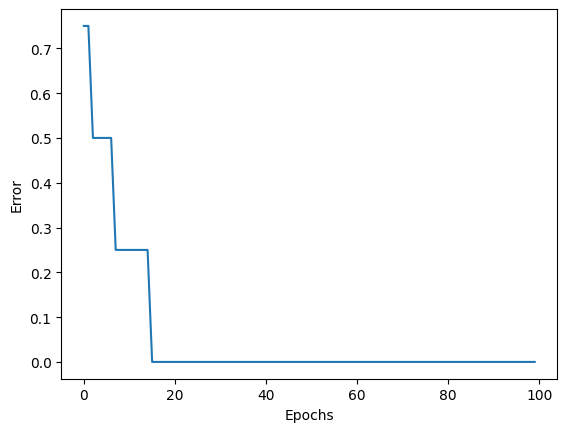

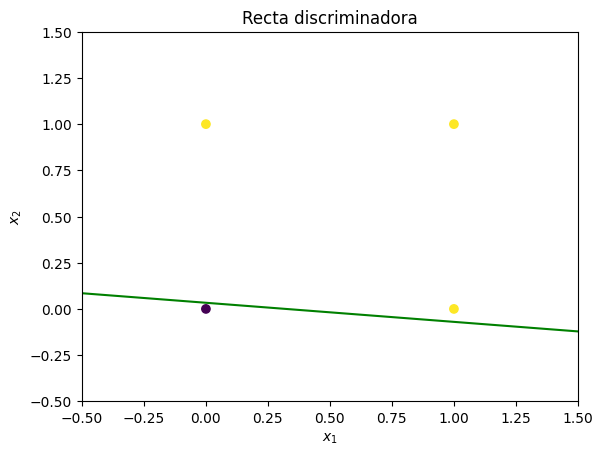

In [509]:
# or de dos entradas
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2))
Y = np.reshape([0, 1, 1, 1], 4)

weights = np.random.randn(3)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)
plot_decision_boundary(weights, X, Y)

$\text{Tabla de verdad del AND}$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $\text{AND}(x_1,x_2,x_3,x_4)$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ |

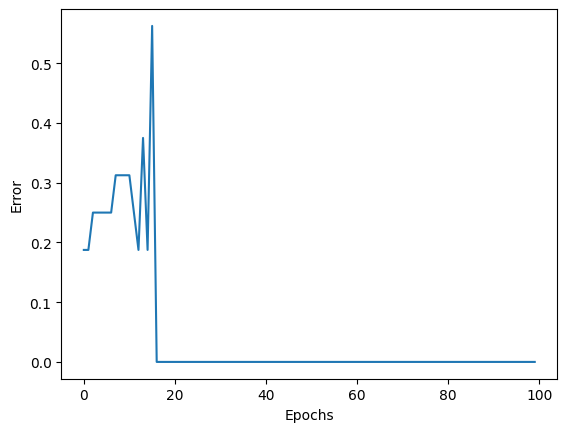

In [510]:
# and de cuatro entradas
X = np.reshape([list(x) for x in product([0, 1], repeat=4)], (16, 4))
Y = np.reshape([x1 * x2 * x3 * x4 for x1, x2, x3, x4 in X], 16)

weights = np.random.randn(5)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)

$\text{Tabla de verdad del OR}$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $\text{OR}(x_1,x_2,x_3,x_4)$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |

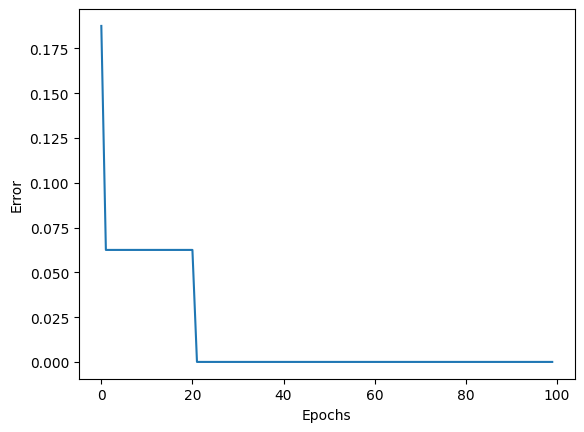

In [511]:
# or de cuatro entradas
X = np.reshape([list(x) for x in product([0, 1], repeat=4)], (16, 4))
Y = np.reshape([x1 + x2 + x3 + x4 > 0 for x1, x2, x3, x4 in X], 16)

weights = np.random.randn(5)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)

$\underline{\text{Ejercicio } 2}$  
Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.

$\underline{\text{Ejercicio } 3}$  
Implemente un perceptrón multicapa que aprenda la función lógica $\text{XOR}$ de $2$ y de $4$ entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre cómo evoluciona el error durante el entrenamiento.

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    def forward(self, input):
        # TODO: calcular el output y devolverlo
        pass
    def backward(self, output_gradient, learning_rate):
        # TODO: actualizar los parámetros y devolver el gradiente del input
        pass

class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [56]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    def forward(self, input):
        # TODO: calcular el output y devolverlo
        pass
    def backward(self, output_gradient, learning_rate):
        # TODO: actualizar los parámetros y devolver el gradiente del input
        pass

class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)
    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output
    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
    def forward(self, input):
        return np.reshape(input, self.output_shape)
    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

class Sigmoid(Activation):
    def __init__(self):
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)
        super().__init__(sigmoid, sigmoid_prime)

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

$\text{Ejercicio } 6$

In [67]:
# cargar datos
def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = to_categorical(y, 10)
    y = y.reshape(len(y), 10, 1)
    return x, y

x_train = torch.load('data/conv/MNIST_training_data.pt', weights_only=True).numpy()
y_train = torch.load('data/conv/MNIST_training_labels.pt', weights_only=True).numpy()
x_test = torch.load('data/conv/MNIST_test_data.pt', weights_only=True).numpy()
y_test = torch.load('data/conv/MNIST_test_labels.pt', weights_only=True).numpy()

x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

# train
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=20,
    learning_rate=0.1
)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")

1/20, error=0.19368903679111552
2/20, error=0.07423601088420022
3/20, error=0.05492684041942095
4/20, error=0.042957420977742515
5/20, error=0.03436638863192796
6/20, error=0.028424568169679844
7/20, error=0.02329338499337068
8/20, error=0.01937877304681913
9/20, error=0.016744882837084914
10/20, error=0.015088138333643406
11/20, error=0.013598223303622856
12/20, error=0.012341815297100857
13/20, error=0.011224226748056168
14/20, error=0.010249368244401978
15/20, error=0.009233988576482851
16/20, error=0.008405216097041084
17/20, error=0.00777157277999967
18/20, error=0.007221463081558311
19/20, error=0.006711786937025485
20/20, error=0.006235433142311135
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true: 0
pred: 1, true: 1
pred: 0, true